In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test (1).csv")

In [3]:
combined = pd.concat([train_df.drop(columns=["Segmentation"]), test_df], ignore_index=True)

In [4]:
categorical_cols = combined.select_dtypes(include='object').columns
numerical_cols = combined.select_dtypes(include=['int64', 'float64']).columns

In [5]:
for col in categorical_cols:
    combined[col] = combined[col].fillna(combined[col].mode()[0])

In [6]:
for col in numerical_cols:
    combined[col] = combined[col].fillna(combined[col].median())

In [7]:
for col in categorical_cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))

In [8]:
features = combined.drop(columns=["ID"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
inertia = []
K = range(1, 11)

In [10]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

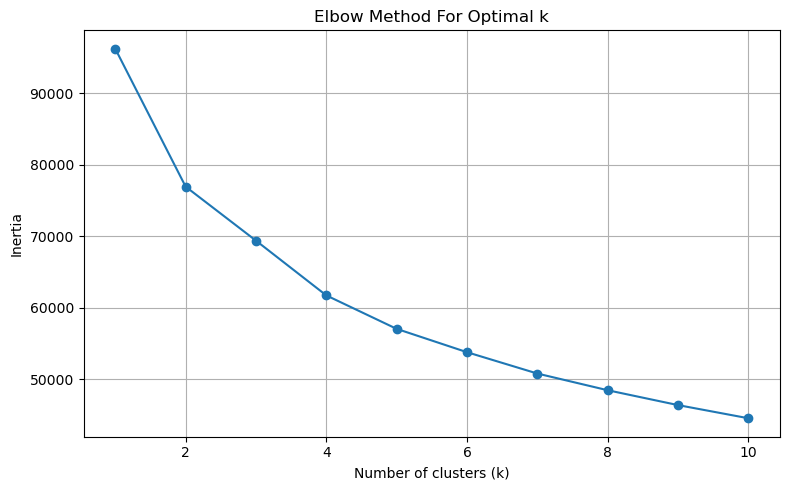

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.grid(True)
plt.tight_layout()
plt.savefig("elbow_plot.png")
plt.show()

In [12]:
best_k = 4

In [13]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
combined["Cluster"] = final_kmeans.fit_predict(scaled_features)

In [15]:
test_clusters = combined.iloc[len(train_df):][["ID", "Cluster"]]
test_clusters.to_csv("cluster_submission.csv", index=False)

In [16]:
submission = pd.read_csv('cluster_submission.csv')

In [17]:
submission

,ID,Cluster
0,458989,0
1,458994,1
2,458996,3
3,459000,3
4,459001,2
...,...,...
2622,467954,2
2623,467958,0
2624,467960,0
2625,467961,1
